In [4]:
from scipy.integrate import *
from matplotlib.pyplot import *
import numpy as np


In [9]:
cai = 100.0e-9
cae = 1e-6
nserca = 8678.0

# Reaction Rates
kx1_x1a=2*1.0e8
kx1a_x2=1.0e8
kx1a_x1=83.666
kx2_x1a=2*83.666
kx2_y2=0.6
ky2_x2=0.097
ky2_y1a=2*30.015
ky1a_y1=30.015
ky1a_y2=1.0e5
ky1_y1a=2*1.0e5
ky1_x1=0.4
kx1_y1=1.20e-3

f = 1
#modification in reaction rates
kx2_y2=0.6
ky2_x2=4.118

ky1_x1=f*0.4
kx1_y1=f*1.20e-3

# Volume Normalisations
vol_er = (3.9*0.1*0.1) # all units in um
vol_cyt = (4.0*0.5*0.5-vol_er)
vol_tot = vol_cyt + vol_er
ntot = 1
ctot = ntot/vol_tot
fvol_cyt = vol_cyt/vol_tot
fvol_er = vol_er/vol_tot

ncai = cai #*vol_cyt*6.022*1e8
ncae = cae #*vol_er*6.022*1e8


In [10]:
# SERCA ODE model
def serca_ode(v ,t):
	fx1, fx1a, fx2,	fy1, fy1a, fy2, ncae = v 
	
	dx1 = fx1*(-kx1_x1a*ncai-kx1_y1)+fx1a*kx1a_x1+fy1*ky1_x1
	dx1a = fx1a*(-kx1a_x2*ncai-kx1a_x1)+fx1*ncai*kx1_x1a+fx2*kx2_x1a
	dx2 = fx2*(-kx2_y2-kx2_x1a)+fx1a*ncai*kx1a_x2+fy2*ky2_x2

	dy1 = fy1*(-ky1_y1a*ncae-ky1_x1)+fy1a*ky1a_y1+fx1*kx1_y1
	dy1a = fy1a*(-ky1a_y2*ncae-ky1a_y1)+fy1*ncae*ky1_y1a+fy2*ky2_y1a
	dy2 = fy2*(-ky2_x2-ky2_y1a)+fy1a*ncae*ky1a_y2+fx2*kx2_y2
	
	dcae = -ncae*(fy1a*ky1a_y2 + fy1*ky1_y1a) + (fy1a*ky1a_y1 + fy2*ky2_y1a)

	return [dx1, dx1a, dx2, dy1, dy1a, dy2, dcae]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


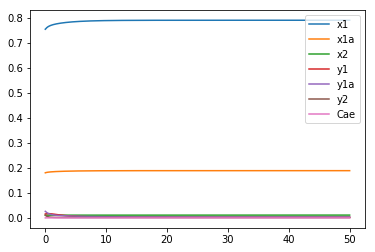

In [12]:
# Initial Conditions
v0 = [0.75554529, 0.18054556, 0.010757505, 0.015718635, 0.026363904, 0.011069105]
#v0 = [i*nserca for i in v0]
v0.append(ncae)

tstep = 10e-3
tf = 50.0

t = np.linspace(0, tf, tf/tstep+1)

# Solve ODE
sol = odeint(serca_ode, v0, t)

label = ['x1', 'x1a', 'x2', 'y1', 'y1a', 'y2', 'ncae']
for i in range(6):
	plot(t,sol[:,i], label=label[i])
#show()
#close()
#print sol[:,6]
plot(t,sol[:,6], label='Cae')
legend()
show()

